In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(0)

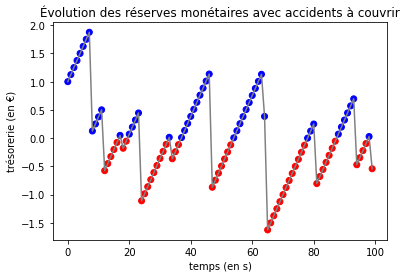

In [3]:
N = 100  # Durée totale (en s)
T = np.arange(N)  # Indices des temps
u0 = 1  # Quantité de départ (en €)
c = 0.125  # Débit d'argent rentrant (en €/s)
lambda_T = 0.1  # Paramètre de la loi de Poisson pour les durées entre sinistres
ix = np.cumsum(np.append(0, np.random.poisson(lambda_T, N)))  # Indices cumulés des événements de Poisson
x_max = int(N * lambda_T + 5 * np.sqrt((N * lambda_T)))  # Taille fixe du tableau des sinistres potentiels (jusqu'à +5*sigma)
lambda_X = 1
x = np.random.exponential(1 / lambda_X, x_max)  # Coûts des sinistres

s = lambda x, ix: np.vectorize(lambda i: np.sum(x[ix[i]: ix[i+1]]))  # Discrétisation des sinistres
X = s(x, ix)(T)  # Total à payer (en €/s)
u = u0 + c * np.arange(N) - np.cumsum(X)

plt.title("Évolution des réserves monétaires avec accidents à couvrir")
plt.xlabel("temps (en s)")
plt.ylabel("trésorerie (en €)")
plt.scatter(T, u, c=np.array(['b', 'r'])[(u<0).astype(int)])
plt.plot(u, c='gray')
plt.show()

$u_{n} = u_{0} + c n - \sum_{i = 0}^{N_{n}} X_i$